In [69]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = {
    'bank': "1dzL_SWBkBs5xrUxuGQTm04oe3USgkL9u",    # banking data
    'sales': "1QK-VgSU3AxXUw330KjYFUj8S9hzKJsG6",   # sales data
    'mcc': "1JN0bR84sgZ_o4wjKPBUmz45NeEEkVgt7",     # mcc description
}

In [71]:
for name, file_id in data.items():
    gdown.download(f'https://drive.google.com/uc?id={file_id}', name + '.parquet', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dzL_SWBkBs5xrUxuGQTm04oe3USgkL9u
To: c:\feup\BrasaHackaton\dataset\bank.parquet
100%|██████████| 1.57M/1.57M [00:00<00:00, 4.47MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QK-VgSU3AxXUw330KjYFUj8S9hzKJsG6
To: c:\feup\BrasaHackaton\dataset\sales.parquet
100%|██████████| 6.37M/6.37M [00:00<00:00, 8.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JN0bR84sgZ_o4wjKPBUmz45NeEEkVgt7
To: c:\feup\BrasaHackaton\dataset\mcc.parquet
100%|██████████| 57.3k/57.3k [00:00<00:00, 728kB/s]


In [72]:
df = {}
for name in data.keys():
    df[name] = pd.read_parquet(name + '.parquet')

In [73]:
df['sales']

,document_id,date_time,value,card_number,type,mcc,state
0,9132021237731236867,2022-12-08 01:09:53.352600,240.00,,Pix,5499,RN
1,9132021237731236867,2022-12-04 03:04:08.115900,88.00,,Pix,5499,RN
2,9132021237731236867,2022-12-07 03:07:05.865600,76.00,,Pix,5499,RN
3,9132021237731236867,2022-12-05 02:45:01.539400,48.00,,Pix,5499,RN
4,9132021237731236867,2022-12-08 03:10:59.259900,8.00,,Pix,5499,RN
...,...,...,...,...,...,...,...
266965,1520813460744343295,2022-12-01 17:11:55.749500,319.80,1508673741982500096,Alimentação,5422,RS
266966,1520813460744343295,2023-05-17 02:06:09.048800,9.60,6001044247338530816,Alimentação,5422,RS
266967,1520813460744343295,2023-03-01 17:52:01.241600,309.40,,Alimentação,5422,RS
266968,1520813460744343295,2023-01-09 00:11:01.052900,887.32,3182228169760180736,Alimentação,5422,RS


In [74]:
df['bank']

,document_id,date_time,value,counterparty_document,type
0,5615027685943047372,2023-02-08 19:02:36.289545,400000.00,2701672467485454263,pix_in
1,6321206883189082161,2023-05-21 17:45:10.407340,330000.00,5674766186099233601,pix_in
2,6204525363384429949,2023-05-19 14:53:21.567099,200000.00,2193750750108086695,pix_out
3,6347736874608223396,2023-04-05 12:13:38.056087,200000.00,904790816053028747,pix_out
4,6347736874608223396,2023-04-07 23:44:04.727672,200000.00,904790816053028747,pix_out
...,...,...,...,...,...
66184,4176676849454697385,2023-01-17 12:27:44.012951,0.88,6015991367796145791,pix_in
66185,4176676849454697385,2022-12-23 16:38:35.784940,0.80,6015991367796145791,pix_out
66186,6367852746770439350,2023-01-09 05:49:23.584379,0.80,5566228780935135215,pix_in
66187,5952522905932206715,2022-12-21 22:14:41.099309,0.60,3467101161978958464,pix_in


In [75]:
# Unique payment types
unique_types = df['sales']['type'].unique()
print(unique_types)

['Pix' 'Débito' 'Voucher' 'Crédito' 'Benefícios' 'Alimentação' 'Refeição'
 'Flex']


In [76]:
# Remove transactions between the same document
df['bank'] = df['bank'][df['bank']['document_id'] != df['bank']['counterparty_document']]

# Remove outgoing transactions
df['bank'] = df['bank'][df['bank']['type'] != 'pix_out']

df['bank']

,document_id,date_time,value,counterparty_document,type
0,5615027685943047372,2023-02-08 19:02:36.289545,400000.00,2701672467485454263,pix_in
1,6321206883189082161,2023-05-21 17:45:10.407340,330000.00,5674766186099233601,pix_in
6,5615027685943047372,2023-03-05 11:20:10.322203,200000.00,8222578902735271623,pix_in
7,5615027685943047372,2023-03-06 11:37:40.236905,200000.00,8222578902735271623,pix_in
9,5615027685943047372,2023-03-11 19:08:30.834887,160000.00,1675455838011611815,pix_in
...,...,...,...,...,...
66183,453832840298988785,2023-02-27 16:58:34.952689,1.00,7665343847314010680,pix_in
66184,4176676849454697385,2023-01-17 12:27:44.012951,0.88,6015991367796145791,pix_in
66186,6367852746770439350,2023-01-09 05:49:23.584379,0.80,5566228780935135215,pix_in
66187,5952522905932206715,2022-12-21 22:14:41.099309,0.60,3467101161978958464,pix_in


In [77]:
df['sales']

,document_id,date_time,value,card_number,type,mcc,state
0,9132021237731236867,2022-12-08 01:09:53.352600,240.00,,Pix,5499,RN
1,9132021237731236867,2022-12-04 03:04:08.115900,88.00,,Pix,5499,RN
2,9132021237731236867,2022-12-07 03:07:05.865600,76.00,,Pix,5499,RN
3,9132021237731236867,2022-12-05 02:45:01.539400,48.00,,Pix,5499,RN
4,9132021237731236867,2022-12-08 03:10:59.259900,8.00,,Pix,5499,RN
...,...,...,...,...,...,...,...
266965,1520813460744343295,2022-12-01 17:11:55.749500,319.80,1508673741982500096,Alimentação,5422,RS
266966,1520813460744343295,2023-05-17 02:06:09.048800,9.60,6001044247338530816,Alimentação,5422,RS
266967,1520813460744343295,2023-03-01 17:52:01.241600,309.40,,Alimentação,5422,RS
266968,1520813460744343295,2023-01-09 00:11:01.052900,887.32,3182228169760180736,Alimentação,5422,RS


In [78]:
# Agrupar por counterparty_document e calcular a média da coluna value
mean_values = df['bank'].groupby('counterparty_document')['value'].mean()

# Exibir o resultado
print(mean_values)


counterparty_document
27150544088378          48.0
345020050117820        316.0
857911140918458         20.0
982180126068621         24.0
1484487824357073        16.0
                       ...  
9222230785374978155    128.0
9222852372408945237    115.0
9222894982097696200    400.0
9223165685087753940     37.2
9223313739566494973    144.0
Name: value, Length: 25504, dtype: float64


In [79]:
# Converter a coluna date_time para datetime
df['sales']['date_time'] = pd.to_datetime(df['sales']['date_time'])
df['bank']['date_time'] = pd.to_datetime(df['bank']['date_time'])


In [80]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Filter BANK frequent clients
grouped = df['bank'].groupby(['counterparty_document', 'document_id'])
filtered = grouped.filter(lambda x: len(x) > 10)

# Order by date_time
filtered = filtered.sort_values(by='date_time')

print(filtered.head(3))

# Storing the results
results = []

# Linear regression model for each pair
for name, group in filtered.groupby(['counterparty_document', 'document_id']):
    # Calculate the difference between each transaction
    group['days_diff'] = group['date_time'].diff().dt.days
    
    # Ignore the first line, because it will be NaN
    group = group.dropna(subset=['days_diff'])
    
    # Divide the data into X and y
    X = group['days_diff'][:-1].values.reshape(-1, 1)  # All, except the last one
    y = group['days_diff'][1:].values.reshape(-1, 1)   # All, except the first one
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the next interval
    last_interval = group['days_diff'].values[-2].reshape(-1, 1)
    predicted_interval = round(model.predict(last_interval)[0][0])

    
    # Compare with the actual interval
    actual_interval = group['days_diff'].values[-1]
    
    # Store the results
    results.append({
        'pair': name,
        'predicted_interval': predicted_interval,
        'actual_interval': actual_interval,
        'difference': abs(predicted_interval - actual_interval)
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Show the results
print(results_df[['predicted_interval', 'actual_interval', 'difference']])

# Evaluate the model
mae = mean_absolute_error(results_df['actual_interval'], results_df['predicted_interval'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(results_df['actual_interval'], results_df['predicted_interval'])
print(f"Mean Squared Error: {mse}")


r2 = r2_score(results_df['actual_interval'], results_df['predicted_interval'])
print(f"R^2 Score: {r2}")



               document_id                  date_time    value  \
59349   453832840298988785 2022-12-01 02:41:26.346660    40.00   
13634  5695527918944804612 2022-12-01 16:05:02.138420   769.36   
6538   5695527918944804612 2022-12-02 02:27:18.835074  2000.00   

       counterparty_document    type  
59349    5271126038184650252  pix_in  
13634    7936909262763988389  pix_in  
6538     7936909262763988389  pix_in  
     predicted_interval  actual_interval  difference
0                    11              6.0         5.0
1                    10              5.0         5.0
2                     7             17.0        10.0
3                     2              2.0         0.0
4                     3              4.0         1.0
..                  ...              ...         ...
351                   7              6.0         1.0
352                  13              1.0        12.0
353                   9              4.0         5.0
354                   2              3.0         

In [81]:

# Filter SALES frequent clients
sales_grouped = df['sales'].groupby(['card_number', 'document_id'])
sales_filtered = sales_grouped.filter(lambda x: len(x) >10)

# Order by date_time
sales_filtered = sales_filtered.sort_values(by='date_time')

print(sales_filtered.head(3))

# Storing the sales_results
sales_results = []

# Linear regression model for each pair
for name, group in sales_filtered.groupby(['card_number', 'document_id']):
    # Calculate the difference between each transaction
    group['days_diff'] = group['date_time'].diff().dt.days
    
    # Ignore the first line, because it will be NaN
    group = group.dropna(subset=['days_diff'])
    
    # Divide the data into X and y
    X = group['days_diff'][:-1].values.reshape(-1, 1)  # All, except the last one
    y = group['days_diff'][1:].values.reshape(-1, 1)   # All, except the first one
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the next interval
    last_interval = group['days_diff'].values[-2].reshape(-1, 1)
    predicted_interval = round(model.predict(last_interval)[0][0])

    # Calculate the standard deviation of the intervals
    std_dev = group['days_diff'].std()

    # Determine the range for the next transaction
    next_interval_range = (round(predicted_interval - std_dev), round(predicted_interval + std_dev))
    
    # Get the penultimate transaction date
    penultimate_date = group['date_time'].iloc[-2]  # Penultimate date
    
    # Calculate the range of dates for the next transaction
    next_dates_range = (
        penultimate_date + pd.to_timedelta(next_interval_range[0], unit='D'),
        penultimate_date + pd.to_timedelta(next_interval_range[1], unit='D')
    )

    actual_next_date = group['date_time'].max()

    # Compare with the actual interval
    actual_interval = group['days_diff'].values[-1]

    # Check if actual_next_date is within the next_dates_range
    is_within_range = next_dates_range[0] <= actual_next_date <= next_dates_range[1]
    
    # Store the sales_results
    sales_results.append({
        'pair': name,
        'predicted_interval': predicted_interval,
        'actual_interval': actual_interval,
        'difference': abs(predicted_interval - actual_interval),
        'std_dev': std_dev,
        'next_interval_range': next_interval_range,
        'next_dates_range': next_dates_range,
        'actual_next_date': actual_next_date,
        'is_within_range': is_within_range
    })

# Convert the sales_results to a DataFrame
sales_results_df = pd.DataFrame(sales_results)

# Show the sales_results
print(sales_results_df[['predicted_interval', 'actual_interval', 'difference', 'std_dev', 'next_interval_range', 'next_dates_range', 'actual_next_date', 'is_within_range']])

# Evaluate the model
mae = mean_absolute_error(sales_results_df['actual_interval'], sales_results_df['predicted_interval'])
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(sales_results_df['actual_interval'], sales_results_df['predicted_interval'])
print(f"Mean Squared Error: {mse}")

r2 = r2_score(sales_results_df['actual_interval'], sales_results_df['predicted_interval'])
print(f"R^2 Score: {r2}")

# Calculate the percentage of correct predictions
accuracy_percentage = sales_results_df['is_within_range'].mean() * 100
print(f"Percentage of Correct Predictions: {accuracy_percentage:.2f}%")



                document_id                  date_time  value card_number  \
266763  1520813460744343295 2022-12-01 02:11:50.812200   40.0               
266745  1520813460744343295 2022-12-01 02:11:50.812300  497.2               
264623  1520813460744343295 2022-12-01 02:11:50.812300  115.6               

            type   mcc state  
266763  Refeição  5422    RS  
266745  Refeição  5422    RS  
264623    Débito  5422    RS  
      predicted_interval  actual_interval  difference    std_dev  \
0                      0              0.0         0.0   0.749472   
1                      0              0.0         0.0   0.396548   
2                      1             19.0        18.0   2.648226   
3                      0              1.0         1.0   0.971566   
4                      1              0.0         1.0   2.109560   
...                  ...              ...         ...        ...   
1178                   8              3.0         5.0   8.506276   
1179                  1

Results for selected pair: ('5886837688993996800', 3920121792423225234)
predicted_interval                                                    11
actual_interval                                                      0.0
difference                                                          11.0
std_dev                                                        16.549349
next_interval_range                                             (-6, 28)
next_dates_range       (2023-05-11 16:04:10.759100, 2023-06-14 16:04:...
actual_next_date                              2023-05-17 16:04:14.925600
is_within_range                                                     True
Name: 751, dtype: object
Amount of transactions for this pair: 23


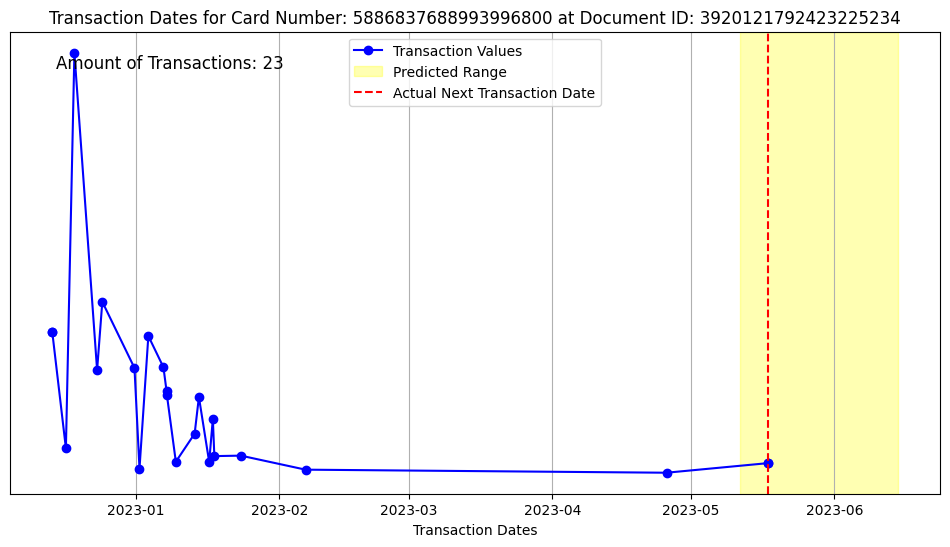

In [82]:
import matplotlib.pyplot as plt
import random

# Select a random pair
random_pair = random.choice(sales_results_df['pair'].unique())

# Filter the sales_results for the selected pair
selected_group = sales_filtered[(sales_filtered['card_number'] == random_pair[0]) & (sales_filtered['document_id'] == random_pair[1])]
selected_result = sales_results_df[sales_results_df['pair'] == random_pair].iloc[0]

print(f"Results for selected pair: {random_pair}")
print(selected_result[['predicted_interval', 'actual_interval', 'difference', 'std_dev', 'next_interval_range', 'next_dates_range', 'actual_next_date', 'is_within_range']])
transaction_count = selected_group.shape[0]
print(f"Amount of transactions for this pair: {transaction_count}")

# Plot it
plt.figure(figsize=(12, 6))
plt.plot(selected_group['date_time'], selected_group['value'], 'bo-', label='Transaction Values')

plt.axvspan(selected_result['next_dates_range'][0], selected_result['next_dates_range'][1], color='yellow', alpha=0.3, label='Predicted Range')
plt.axvline(selected_result['actual_next_date'], color='red', linestyle='--', label='Actual Next Transaction Date')

plt.text(0.05, 0.95, f"Amount of Transactions: {transaction_count}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Title and labels
plt.xlabel('Transaction Dates')
plt.yticks([])
plt.title(f"Transaction Dates for Card Number: {random_pair[0]} at Document ID: {random_pair[1]}")
plt.legend()
plt.grid(True)


# Exhibit the plot
plt.show()


In [83]:

# Group by document_id
grouped = df['sales'].groupby('document_id')

# Count the number of unique card_numbers
unique_card_counts = grouped['card_number'].nunique()

print(unique_card_counts)

# Calculate the average number of unique card_numbers
average_unique_cards = unique_card_counts.mean()

print(f"Average number of unique card_numbers per document_id: {average_unique_cards:.2f}")



document_id
1898616423937443        556
10825678225686420      1864
40944759436046065      1040
150845804022381629     1677
272221220503584164     1640
                       ... 
8836929473261798698    1496
8973801048960393711    1514
8997352755884024136    1357
9132021237731236867    1081
9202060645083883366     637
Name: card_number, Length: 100, dtype: int64
Average number of unique card_numbers per document_id: 1340.19


In [84]:
# Definir uma função para encontrar o intervalo com o menor número de transações maior que 0
def find_min_transactions_interval(df):
    # Resample para criar intervalos de 1 dia
    daily_counts = df.resample('d', on='date_time').size()

    # Filtrar intervalos com contagem maior que 0
    daily_counts = daily_counts[daily_counts > 0]

    # Verificar se há intervalos com contagens maiores que 0
    if daily_counts.empty:
        return None, 0

    # Encontrar o intervalo com o menor número de transações
    min_interval = daily_counts.idxmin()
    min_count = daily_counts.min()

    return min_interval, min_count

# Apply the function to sales dataframe grouped by mcc
results = []
for mcc, group in df['sales'].groupby('mcc'):
    min_interval, min_count = find_min_transactions_interval(group)
    if min_interval is not None:
        results.append({'mcc': mcc, 'min_interval_start': min_interval, 'transaction_count': min_count})

# Criar um DataFrame com os resultados
result_df = pd.DataFrame(results)

# Exibir o resultado
print(result_df)


     mcc min_interval_start  transaction_count
0   4812         2022-12-29                  7
1   5199         2023-05-20                  2
2   5211         2023-01-21                 11
3   5251         2023-03-04                  6
4   5311         2022-12-26                  1
5   5411         2023-05-31                 12
6   5422         2023-05-31                  8
7   5441         2023-03-09                  1
8   5462         2022-12-16                  1
9   5499         2023-05-31                 62
10  5571         2023-03-07                  1
11  5631         2022-12-23                  1
12  5651         2023-01-19                  2
13  5699         2022-12-05                  1
14  5734         2023-01-12                  1
15  5812         2023-05-31                 29
16  5813         2022-12-06                  1
17  5814         2023-01-07                 75
18  5912         2023-05-18                  2
19  5921         2023-02-26                 12
20  5947     